# Import packages to parse results

In [28]:
from glob import glob
from tabulate import tabulate
from IPython.display import HTML
import pandas as pd
import json

import plotly.graph_objects as go
import scipy.stats as stats
import os
import import_ipynb
from shared_notebook import create_dataframe

### Set default color palete and size for making plots

In [29]:
%store -r colorPallet
%store -r bgColor
%store -r baseFigureWidth
%store -r baseFigureHeight

## Log file locations relative to notebook

### For BWA, we have 3 different clusters, 1 method with two different payloads, multiple concurrent calls

In [30]:
# kOps clusters (running on AWS)
# AWS EKS cluster
clusters={
    'kOps 1x 72vCPU 144Gb x86_64': 'kops-multi-tenant-spot-1x-72vcpu-144gb',
    'kOps 8x 8vCPU 16Gb x86_64': 'kops-multi-tenant-spot-8x-8vcpu-16gb',
    'EKS 8x 8vCPU 16Gb x86_64': 'eks-multi-tenant-spot-8x-8vcpu-16gb'
}
methods=('normal', 'tumor')
headers=list(methods)
headers.insert(0, 'concurrent calls')
concurrent_calls=(2, 3, 4, 5)

bwa_df=dict()
for k, v in clusters.items():
    bwa_df[k]=dict()
    for m in methods:
        bwa_df[k][m]=dict()
        for c in concurrent_calls:
            bwa_df[k][m][c]=create_dataframe(f"../logs/openfaas/{v}/bwa/concurrent/{c}/*{m}*")

# Using tabulate to create tables for results

In [31]:
# Mean runtime
table=dict()
runtime_data=dict()
for k in clusters:
    runtime_data[k]=[]
    for count, value in enumerate(concurrent_calls):
        runtime_data[k].append([value])
        for m in methods:
            mean_runtime=bwa_df[k][m][value]['runtime'].mean()
            runtime_data[k][count].append(mean_runtime)
    table[k] = tabulate(runtime_data[k], tablefmt='html', headers=headers)
    display(HTML(f'<h3>Mean runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,normal,tumor
2,84202,97049.7
3,86305.4,99790.6
4,89196.8,105965
5,87812.8,102712


concurrent calls,normal,tumor
2,113339,114827
3,98444,120769
4,112925,108869
5,115001,125902


concurrent calls,normal,tumor
2,112854,110465
3,100482,114089
4,103851,120964
5,125142,134317


# Scatter plot of runtimes

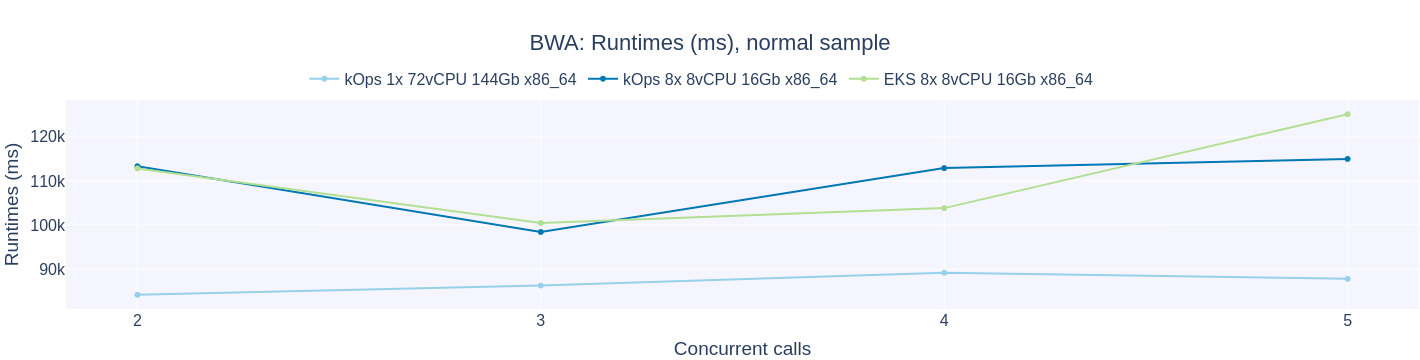

In [32]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title=dict(
        text="BWA: Runtimes (ms), normal sample",
        x=0.5,
        xanchor='center'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = concurrent_calls
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='Runtimes (ms)',
    plot_bgcolor=bgColor
)

for i, k in enumerate(clusters):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [bwa_df[k]['normal'][c]['runtime'].mean() for c in concurrent_calls], 
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

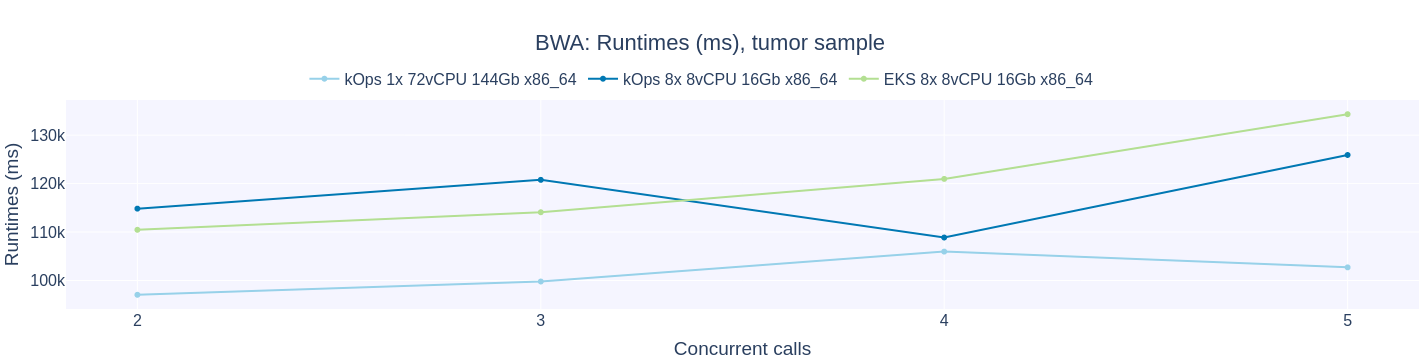

In [33]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        # t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title=dict(
        text="BWA: Runtimes (ms), tumor sample",
        x=0.5,
        xanchor='center'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = concurrent_calls
    ),
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='Runtimes (ms)',
    plot_bgcolor=bgColor
)

for i, k in enumerate(clusters):
    fig.add_trace(
        go.Scatter(
            x = concurrent_calls,
            y = [bwa_df[k]['tumor'][c]['runtime'].mean() for c in concurrent_calls], 
            name = k,
            marker_color=colorPallet[i]
        )
    )
    
fig.show()

In [34]:
# Standard runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            std_runtime=bwa_df[k][m][value]['runtime'].std()
            data[count].append(std_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>Std runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,normal,tumor
2,3861.91,3897.57
3,2503.13,1848.82
4,2342.77,2663.53
5,3540.34,4906.11


concurrent calls,normal,tumor
2,29514.9,21026
3,24241.8,25996.5
4,38499.8,20308.7
5,36042.3,40005.3


concurrent calls,normal,tumor
2,33944.2,14721.6
3,25133.2,23536.6
4,25452.6,29513.4
5,25065.7,36342.2


In [35]:
# CV runtime
table=dict()
for k in clusters:
    data=[]
    for count, value in enumerate(concurrent_calls):
        data.append([value])
        for m in methods:
            mean_runtime=bwa_df[k][m][value]['runtime'].mean()
            std_runtime=bwa_df[k][m][value]['runtime'].std()
            cv_runtime=std_runtime/mean_runtime
            data[count].append(cv_runtime)
    table[k] = tabulate(data, tablefmt='html', headers=headers)
    display(HTML(f'<h3>CV runtimes (ms), cluster <b>{k}</b></h3>'))
    display(table[k])
    print()

concurrent calls,normal,tumor
2,0.0458649,0.0401606
3,0.0290032,0.018527
4,0.0262652,0.0251359
5,0.0403168,0.0477658


concurrent calls,normal,tumor
2,0.260413,0.18311
3,0.246249,0.215259
4,0.340934,0.186542
5,0.313407,0.31775


concurrent calls,normal,tumor
2,0.300781,0.133269
3,0.250127,0.206301
4,0.245087,0.243985
5,0.200297,0.27057


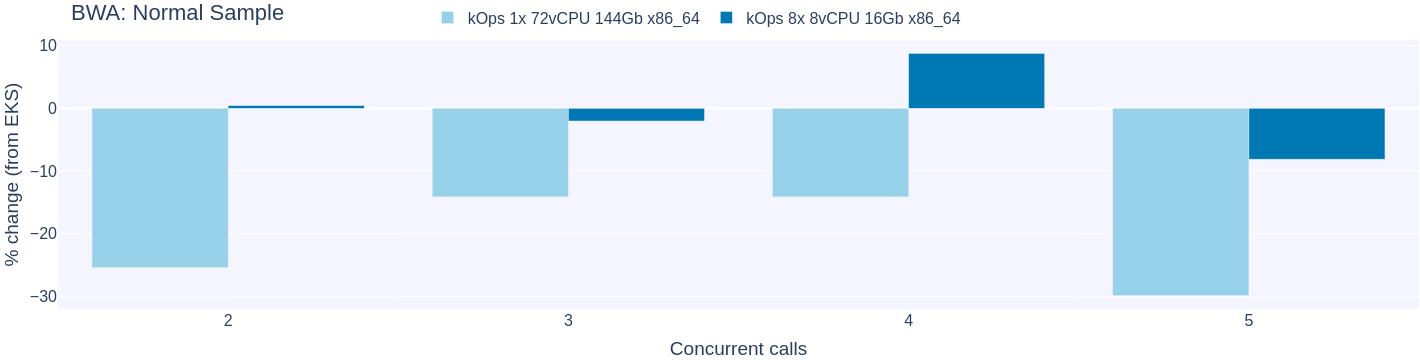

In [37]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        t=1,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title={
        'text': "BWA: Normal Sample",
        # 'xanchor': 'center',
        # 'x': 0.5
    },
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=0):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=bwa_df[k]['normal'][c]['runtime'].mean()
        eks_mean=bwa_df['EKS 8x 8vCPU 16Gb x86_64']['normal'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

# Save graph
if not os.path.exists("graphs"):
    os.mkdir("graphs")
fig.write_image("graphs/bwa_normal_percentage_difference.png", width=baseFigureWidth, height=baseFigureHeight)

In [39]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb x86_64</b> independent t-test (normal sample)</h3>'))
    for i in range(2,6):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(bwa_df[k]['normal'][i]['runtime'], bwa_df['EKS 8x 8vCPU 16Gb x86_64']['normal'][i]['runtime']))

2 concurrent calls
Ttest_indResult(statistic=-3.9336980862447715, pvalue=0.0003078462229771889)
3 concurrent calls
Ttest_indResult(statistic=-3.2242681919320413, pvalue=0.001989583001684395)
4 concurrent calls
Ttest_indResult(statistic=-3.803154560539931, pvalue=0.00026825832392338275)
5 concurrent calls
Ttest_indResult(statistic=-10.853589011478025, pvalue=2.091741893076276e-16)


2 concurrent calls
Ttest_indResult(statistic=0.050587224963924426, pvalue=0.9598942658738038)
3 concurrent calls
Ttest_indResult(statistic=-0.3352378400399563, pvalue=0.7385420599275967)
4 concurrent calls
Ttest_indResult(statistic=1.2846089933245972, pvalue=0.20250270940769763)
5 concurrent calls
Ttest_indResult(statistic=-0.9876944813171509, pvalue=0.3270217807162846)


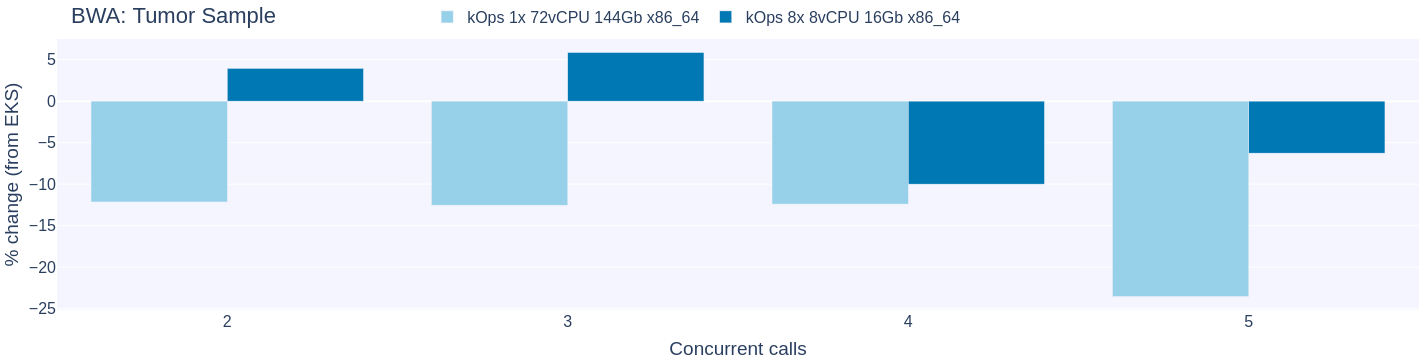

In [40]:
fig = go.Figure()

# Add figure title
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.47
    ),
    margin=dict(
        t=0,
        b=1,
        l=1,
        r=1,
        autoexpand=True
    ),
    font=dict(
        size=16
    ),
    title={
        'text': "BWA: Tumor Sample",
        'y':0.98,
        'yanchor': 'top'},
    xaxis_title_text='Concurrent calls',
    yaxis_title_text='% change (from EKS)',
    plot_bgcolor=bgColor
)

data=[]
for i, k in enumerate(list(clusters.keys())[:-1], start=0):
    y_data=[]
    for c in concurrent_calls:
        kops_mean=bwa_df[k]['tumor'][c]['runtime'].mean()
        eks_mean=bwa_df['EKS 8x 8vCPU 16Gb x86_64']['tumor'][c]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
    fig.add_trace(go.Bar(name=k, x=concurrent_calls, y=y_data, marker_color=colorPallet[i]))

fig.show()

# Save graph
if not os.path.exists("graphs"):
    os.mkdir("graphs")
fig.write_image("graphs/bwa_tumor_percentage_difference.png", width=baseFigureWidth, height=baseFigureHeight)

In [42]:
for k in list(clusters)[:-1]:
    display(HTML(f'<h3><b>{k}</b> and <b>EKS 8x 8vCPU 16Gb x86_64</b> independent t-test (tumor sample)</h3>'))
    for i in range(2,6):
        print(f'{i} concurrent calls')
        print(stats.ttest_ind(bwa_df[k]['tumor'][i]['runtime'], bwa_df['EKS 8x 8vCPU 16Gb x86_64']['tumor'][i]['runtime']))

2 concurrent calls
Ttest_indResult(statistic=-4.127608730523875, pvalue=0.00017516852476648774)
3 concurrent calls
Ttest_indResult(statistic=-3.479034654564732, pvalue=0.0009107985108827158)
4 concurrent calls
Ttest_indResult(statistic=-3.3575628757042546, pvalue=0.0011781007868832559)
5 concurrent calls
Ttest_indResult(statistic=-6.354591416327845, pvalue=2.62522423970789e-08)


2 concurrent calls
Ttest_indResult(statistic=0.7845255111466639, pvalue=0.4372413829935068)
3 concurrent calls
Ttest_indResult(statistic=1.0942372173579427, pvalue=0.2779522159721776)
4 concurrent calls
Ttest_indResult(statistic=-2.231192870526841, pvalue=0.028300707760928884)
5 concurrent calls
Ttest_indResult(statistic=-0.6173416384358626, pvalue=0.5393453043849413)
